In [31]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore

Параметры

In [32]:
N = 50
Cs = 0.001
S = 200
D = 20
valence = -0.5

# Для 2D
L_pore = 100
space = 10
L_wall = 8

# Теория

In [33]:
N, n, theta, _, r_in_dendrons, r_out_dendrons, psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, _ = dendrons_pore(
    Cs = Cs,
    
    #параметры щетки
    alpha = abs(valence),
    S = S,
    
    #параметры поры
    D = D,
    N_opt = N,
    
)

print(N, theta)

50 31.415926535897928


# Namics 2D

In [34]:

# Загрузить конфигурацию
config = config_loader.load_config()

# Обновить параметры
params_to_update = {
    "Cs": Cs,
    "D": D,
    "L_pore": L_pore,
    "L_wall": L_wall,
    "N": N,
    "S": S,
    "chi_solv": 0.5,
    "chi_surf": -0.55,
    "max_val": 0.1,
    "min_val": 0.1,
    "output_dir": "2D_pore_in_files",
    "range_param": 'Cs',
    "space": space,
    "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
    "valence": valence,
}

for param, value in params_to_update.items():
    config = config_loader.update_config_param(config, param, value)

# Сохранить обновлённую конфигурацию
config_loader.save_config(config)


INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 20
INFO:root:Обновление параметра L_pore на 100
INFO:root:Обновление параметра L_wall на 8
INFO:root:Обновление параметра N на 50
INFO:root:Обновление параметра S на 200
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на -0.55
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 10
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


In [35]:
df, x, y, psi, phi_brush, phi_end_brush = out_reader()

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Файл 2D_Cs_0_0010_L100_0_L_wall_8_0_space_10_0_v_-0_50_D_20_N_50_theta_31_42.in успешно создан в 2D_pore_in_files


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.312894e+00 |g| = 2.432345e+00 alpha = 1.000000e+00 
hessian scaling: 0.309589
it =  1  E = 1.224436e+00 |g| = 2.327185e+00 alpha = 1.411126e-01 
it =  2  E = 2.249776e+00 |g| = 2.250716e+00 alpha = 3.734694e-02 
it =  3  E = 2.487044e+00 |g| = 2.198697e+00 alpha = 2.774899e-02 
it =  4  E = 2.798754e+00 |g| = 2.162640e+00 alpha = 2.012735e-02 
it =  5  E = 3.161318e+00 |g| = 2.136346e+00 alpha = 1.461333e-02 
it =  6  E = 3.529404e+00 |g| = 2.116597e+00 alpha = 1.093211e-02 
it =  7  E = 3.898070e+00 |g| = 2.101173e+00 alpha = 8.399357e-03 
it =  8  E = 4.238618e+00 |g| = 2.088754e+00 alpha = 6.685745e-03 
it =  9  E = 4.546613e+00 |g| = 2.078407e+00 alpha = 5.487713e-03 
it =  10  E = 4.808255e+00 |g| = 2.069545e+0

In [36]:
# Доли от центра для y
y_fraction = [0]

# Используем функцию для получения значений по доле
result = get_profiles_by_y_or_x(df, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True)

<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2880724/3954090205.py:9: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")


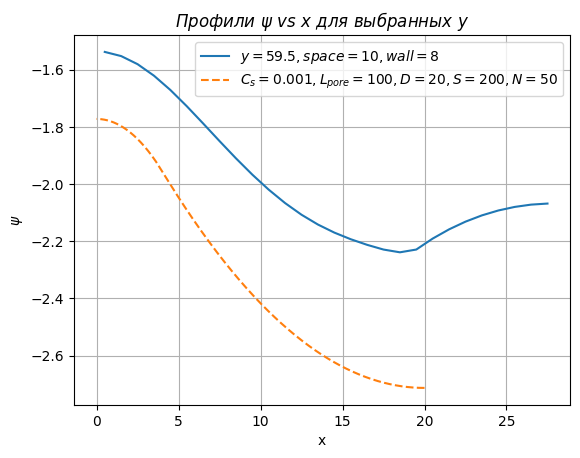

In [37]:
# Построение графиков
for y_val, data in result.items():
    plt.plot(data['x'], data['sys_noname_psi'], label=f"$y = {y_val}, space = {space}, wall = {L_wall}$")
    
plt.plot(np.hstack((r_in_dendrons, r_out_dendrons)), np.hstack((psi_in_dendrons, psi_out_dendrons)), linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')

plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")
plt.legend()
plt.grid()
plt.show()

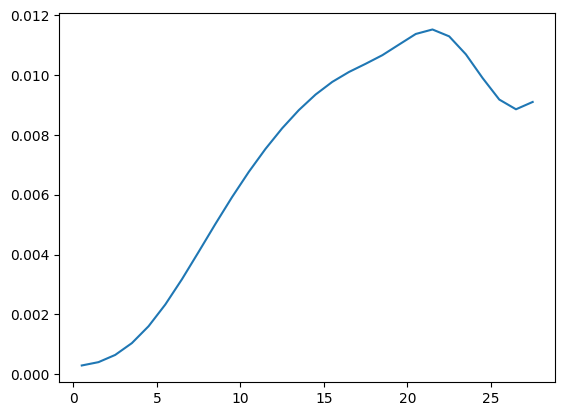

In [38]:
filtered_df = df[df["y"] == 5.5]

# Построение графика
plt.plot(filtered_df["x"], filtered_df["combined_phi"], label="y = 10")

/tmp/ipykernel_2880724/2573777528.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


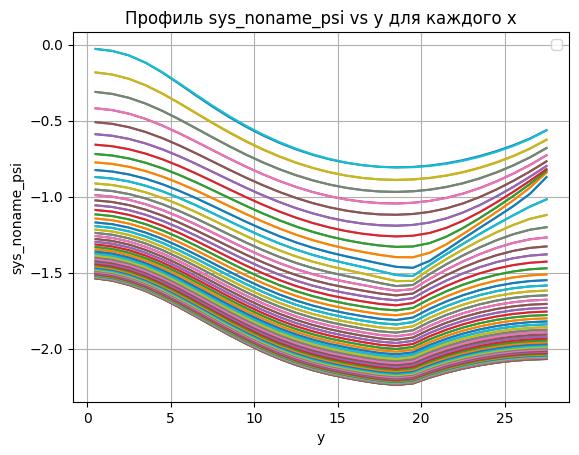

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Группировка по `x` и построение графика sys_noname_psi vs y
for y_val, group in df.groupby("y"):
    plt.plot(group["x"], group["sys_noname_psi"])

# Настройка графика
plt.xlabel("y")
plt.ylabel("sys_noname_psi")
plt.title("Профиль sys_noname_psi vs y для каждого x")
plt.legend()
plt.grid()
plt.show()


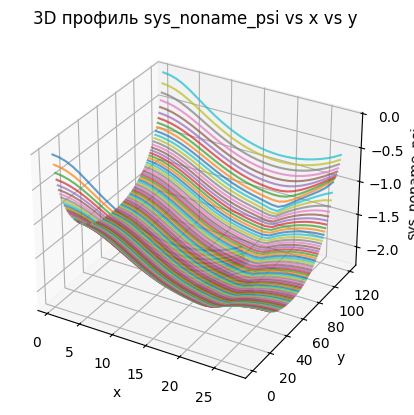

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for y_val, group in df.groupby("y"):
    ax.plot(group["x"], [y_val] * len(group["x"]), group["sys_noname_psi"], alpha=0.7)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("sys_noname_psi")
ax.set_title("3D профиль sys_noname_psi vs x vs y")
plt.show()
